## Adding SNe to CoCo
___

This notebook will go through adding a SN to the CoCo template framework.

In [2]:
%matplotlib inline
# %matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

## Download SN
---
The example that I will go through is probably the simplest one - from a JSON that I have downloaded from http://sne.space contaning the information for SN2010as.

In [3]:
import json

In [4]:
snname = "SN2010as"
path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.json"

sndict = json.load(open(path, 'r'))[snname]

In [5]:
len(sndict["spectra"])

26

In [6]:
S1 = sndict["spectra"][0]

In [7]:
S1.keys()

dict_keys(['time', 'filename', 'instrument', 'observer', 'redshift', 'reducer', 'reduction', 'u_fluxes', 'u_time', 'u_wavelengths', 'data', 'source'])

In [8]:
w = np.array(S1["data"], dtype=np.float64).T[0]
f = np.array(S1["data"], dtype=np.float64).T[1]

In [9]:
f

array([  1.99488800e-16,   2.74730800e-16,   2.80291500e-16, ...,
         5.54147300e-16,   5.59090900e-16,   5.63390900e-16])

In [10]:
from astropy.table import Table, Column, Row
import astropy.units as u

In [11]:
wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

In [12]:
Table([wavelength, flux])

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3674.0,1.994888e-16
3675.92575,2.747308e-16
3677.851501,2.802915e-16
3679.777251,2.936676e-16
3681.703001,3.203338e-16
3683.628751,2.445988e-16
3685.554502,3.125971e-16
3687.480252,2.8318e-16


In [14]:
for s in sndict["spectra"]:
    print(s["time"], s["filename"])

55275.0 SN10as_100320_DUP_WF_b01.dat
55276.0 SN10as_100321_GEM_GM_r01.dat
55277.0 SN10as_100322_DUP_WF_b01.dat
55278.0 SN10as_100323_DUP_WF_b01.dat
55279.0 SN10as_100324_DUP_WF_b01.dat
55280.0 SN10as_100325_DUP_WF_b01.dat
55280.0 SN10as_100325_VLT_XS_nir.dat
55280.0 SN10as_100325_VLT_XS_uvb.dat
55280.0 SN10as_100325_VLT_XS_vis.dat
55281.0 SN10as_100326_VLT_XS_nir.dat
55281.0 SN10as_100326_VLT_XS_uvb.dat
55281.0 SN10as_100326_VLT_XS_vis.dat
55283.0 SN10as_100328_VLT_XS_nir.dat
55283.0 SN10as_100328_VLT_XS_uvb.dat
55283.0 SN10as_100328_VLT_XS_vis.dat
55284.0 SN10as_100329_VLT_XS_nir.dat
55284.0 SN10as_100329_VLT_XS_uvb.dat
55284.0 SN10as_100329_VLT_XS_vis.dat
55295.0 SN10as_100409_SOA_GO_g01.dat
55308.0 SN10as_100422_GEM_GM_c01.dat
55385.0 SN10as_100708_GEM_GM_c01.dat
55400.0 SN10as_100723_SOA_GO_g01.dat
55410.0 SN10as_100802_GEM_GM_c01.dat
55413.0 SN10as_100805_SOA_GO_g01.dat
55597.0 SN10as_110205_BAA_IM_b01.dat
55597.0 SN10as_110205_BAA_IM_r01.dat


In [23]:
to_combine = ["SN10as_100325_VLT_XS_", 
              "SN10as_100326_VLT_XS_", 
              "SN10as_100328_VLT_XS_", 
              "SN10as_100329_VLT_XS_"]

to_combine_phases = [55280.0,
                     55281.0,
                     55283.0,
                     55284.0]

spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# spec_filenames = [spec["filename"][:-7] for spec in sndict["spectra"]]

for prefix in to_combine:
    print([f for f in spec_filenames if prefix in f])

['SN10as_100325_VLT_XS_nir.dat', 'SN10as_100325_VLT_XS_uvb.dat', 'SN10as_100325_VLT_XS_vis.dat']
['SN10as_100326_VLT_XS_nir.dat', 'SN10as_100326_VLT_XS_uvb.dat', 'SN10as_100326_VLT_XS_vis.dat']
['SN10as_100328_VLT_XS_nir.dat', 'SN10as_100328_VLT_XS_uvb.dat', 'SN10as_100328_VLT_XS_vis.dat']
['SN10as_100329_VLT_XS_nir.dat', 'SN10as_100329_VLT_XS_uvb.dat', 'SN10as_100329_VLT_XS_vis.dat']


In [21]:
spec_filenames

['SN10as_100320_DUP_WF_',
 'SN10as_100321_GEM_GM_',
 'SN10as_100322_DUP_WF_',
 'SN10as_100323_DUP_WF_',
 'SN10as_100324_DUP_WF_',
 'SN10as_100325_DUP_WF_',
 'SN10as_100325_VLT_XS_',
 'SN10as_100325_VLT_XS_',
 'SN10as_100325_VLT_XS_',
 'SN10as_100326_VLT_XS_',
 'SN10as_100326_VLT_XS_',
 'SN10as_100326_VLT_XS_',
 'SN10as_100328_VLT_XS_',
 'SN10as_100328_VLT_XS_',
 'SN10as_100328_VLT_XS_',
 'SN10as_100329_VLT_XS_',
 'SN10as_100329_VLT_XS_',
 'SN10as_100329_VLT_XS_',
 'SN10as_100409_SOA_GO_',
 'SN10as_100422_GEM_GM_',
 'SN10as_100708_GEM_GM_',
 'SN10as_100723_SOA_GO_',
 'SN10as_100802_GEM_GM_',
 'SN10as_100805_SOA_GO_',
 'SN10as_110205_BAA_IM_',
 'SN10as_110205_BAA_IM_']

We need a (rough) estimate of the time of maximum light (only to ensure the spectra adhere to our naming convention), so from Folatelli et al. 2014 (http://iopscience.iop.org/article/10.1088/0004-637X/792/1/7/pdf) we have:

In [13]:
mjdmax = 55286.4

In [14]:
fname_offset = 0.01
phase_list = []
for s in sndict["spectra"]:
    phase = np.float64(s["time"])-mjdmax
    
    if phase not in phase_list:
        phase_list.append(phase)
        
    else:
        i=1
        
        while phase in phase_list:
            phase = phase + fname_offset*i
            i+=1
        phase_list.append(phase)
            
    

In [15]:
phase_list

[-11.400000000001455,
 -10.400000000001455,
 -9.4000000000014552,
 -8.4000000000014552,
 -7.4000000000014552,
 -6.4000000000014552,
 -6.3900000000014554,
 -6.3700000000014558,
 -6.3400000000014556,
 -5.4000000000014552,
 -5.3900000000014554,
 -5.3700000000014558,
 -3.4000000000014552,
 -3.3900000000014554,
 -3.3700000000014554,
 -2.4000000000014552,
 -2.3900000000014554,
 -2.3700000000014554,
 8.5999999999985448,
 21.599999999998545,
 98.599999999998545,
 113.59999999999854,
 123.59999999999854,
 126.59999999999854,
 310.59999999999854,
 310.60999999999854]

In [33]:
list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
outdir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"

max_phase = 50.

spec_path_out_list = []
snname_list = []
mjd_list = []
z_list = []

for i, s in enumerate(sndict["spectra"]):
    
    w = np.array(s["data"], dtype=np.float64).T[0]
    f = np.array(s["data"], dtype=np.float64).T[1]
    
    wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
    flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
    
    spec_table = Table([wavelength, flux])
    
    S = pcc.SpectrumClass()
    
    spec_file = s["filename"]
    
    S.load_table(spec_table, path=spec_file)
    #S.plot()
    newname = snname+"_"+str(round(phase_list[i], 2))+".txt"
    

    if phase_list[i] < max_phase:
        spec_path_out_list.append(os.path.join(outdir, newname))
        snname_list.append(snname)
        mjd_list.append(s["time"])
        z_list.append(s["redshift"])
        print(os.path.join(outdir, newname))
        S.save(filename=newname, path=outdir, format="ascii.commented_header",verbose=True)
        
        print(newname, snname, s["time"], s["redshift"])
        

list_table = Table([spec_path_out_list, snname_list, mjd_list, z_list])
list_table.write(filename=list_file_path, format="ascii.fast_no_header")  

/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-11.4.txt
has data
SN2010as_-11.4.txt SN2010as 55275.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-10.4.txt
has data
SN2010as_-10.4.txt SN2010as 55276.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-9.4.txt
has data
SN2010as_-9.4.txt SN2010as 55277.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-8.4.txt
has data
SN2010as_-8.4.txt SN2010as 55278.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-7.4.txt
has data
SN2010as_-7.4.txt SN2010as 55279.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.4.txt
has data
SN2010as_-6.4.txt SN2010as 55280.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.39.txt
has data
SN2010as_-6.39.txt SN2010as 55280.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.37.txt
has data
SN2010as_-6.37.txt SN2010as 55280.0 0.007315


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")



has data
SN2010as_-3.4.txt SN2010as 55283.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-3.39.txt
has data
SN2010as_-3.39.txt SN2010as 55283.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-3.37.txt
has data
SN2010as_-3.37.txt SN2010as 55283.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-2.4.txt
has data
SN2010as_-2.4.txt SN2010as 55284.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-2.39.txt
has data
SN2010as_-2.39.txt SN2010as 55284.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-2.37.txt
has data
SN2010as_-2.37.txt SN2010as 55284.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_8.6.txt
has data
SN2010as_8.6.txt SN2010as 55295.0 0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_21.6.txt
has data
SN2010as_21.6.txt SN2010as 55308.0 0.007315


In [34]:
list_table

col0,col1,col2,col3
str71,str8,str7,str8
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-11.4.txt,SN2010as,55275.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-10.4.txt,SN2010as,55276.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-9.4.txt,SN2010as,55277.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-8.4.txt,SN2010as,55278.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-7.4.txt,SN2010as,55279.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.4.txt,SN2010as,55280.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.39.txt,SN2010as,55280.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.37.txt,SN2010as,55280.0,0.007315
/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN2010as_-6.34.txt,SN2010as,55280.0,0.007315


In [35]:
info = pcc.InfoClass()
info.load()

In [36]:
info._data

snname,z_obs,mu,RA,Dec,Type,z_distmod,SkyCoords
,,,,,,,"deg,deg"
str9,float64,float64,str13,str13,str3,float64,object
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565,"148.85322791666664,69.02047277777778"
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245,"202.47529999999995,47.191805555555554"
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656,"165.92491666666666,28.903805555555554"
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351,"293.76320833333324,-52.846138888888895"
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452,"354.06125,2.1524444444444444"
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014,"24.099375,15.753666666666666"
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466,"350.2640833333333,-4.8959722222222215"
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379,"179.45933333333332,25.265305555555557"


In [37]:
small_table = info._data[("snname", "z_obs", "mu", "RA", "Dec", "Type", "z_distmod")]

In [38]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [39]:
sndict.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostcomovingdist', 'hostdec', 'hostlumdist', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostredshift', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [40]:
sndict["lumdist"]

[{'e_value': '11',
  'kind': 'host',
  'source': '3',
  'u_value': 'Mpc',
  'value': '30'}]

In [41]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

mu = 32.16 ## from NED -- https://ned.ipac.caltech.edu/ui/?q=objsearch&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&extend=no&hconst=73&out_csys=Equatorial&of=pre_text&img_stamp=YES&list_limit=5&out_equinox=J2000.0&corr_z=1&objname=NGC%206000

d = Distance(distmod=mu)

z_distmod = d.z

In [42]:
(snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod)

('SN2010as',
 '0.007315',
 32.16,
 '15:49:49.23',
 '-29:23:09.7',
 'Ibc',
 0.0062219449351045312)

In [43]:
small_table.add_row((snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod))

In [44]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [47]:
outfile = pcc._default_info_path.replace(".dat", "_new.dat")
small_table.write(outfile, format="ascii.commented_header")


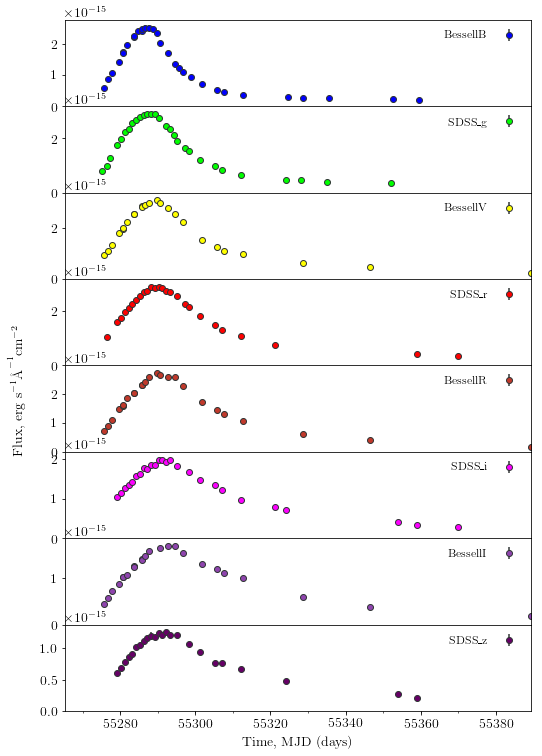

In [50]:
SN = pcc.SNClass(snname)
SN.load_phot()
SN.plot_lc()

In [54]:
# list_path = "/Users/berto/Code/CoCo/lists/"+snname+".list"
list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
SN.load_list(path=list_file_path)

In [55]:
SN.load_spec()

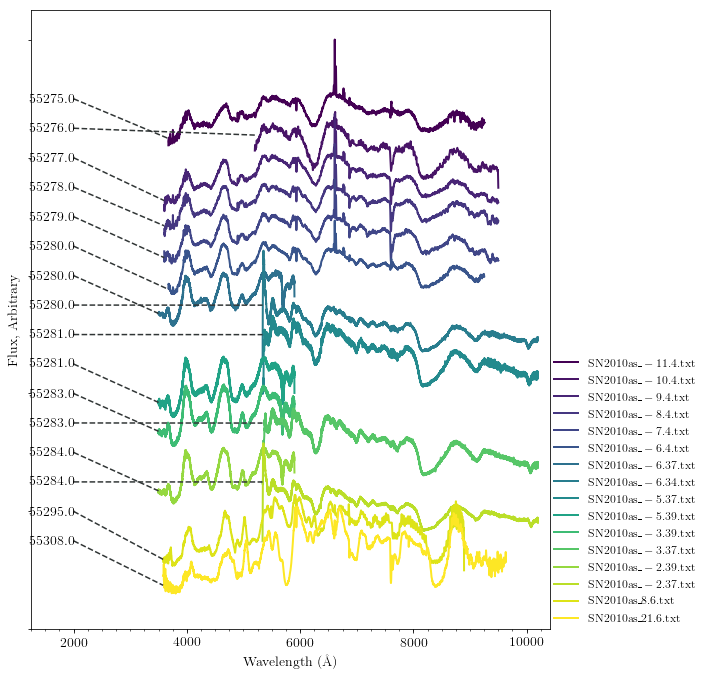

In [56]:
SN.plot_spec()

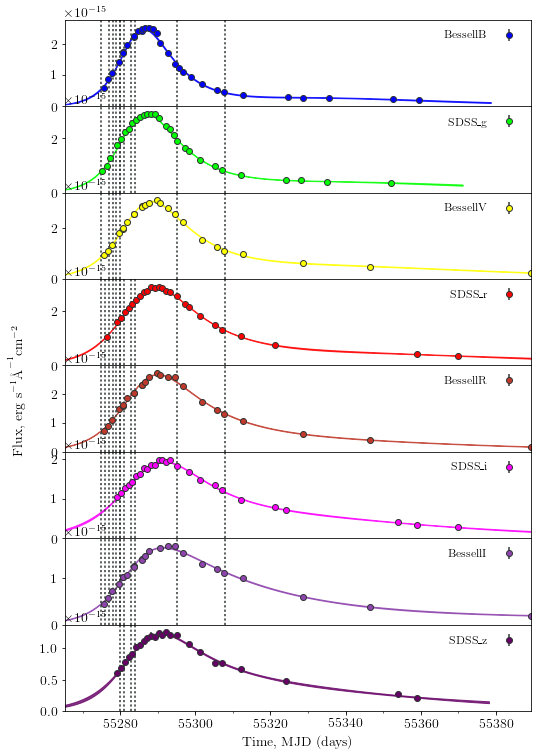

In [58]:
fit_path = "/Users/berto/Code/CoCo/recon/"+snname+".dat"
SN.get_lcfit(fit_path)

SN.plot_lc()

In [59]:
pcc.run_specfit(list_file_path)

current list.txt is up to date. re run with force = True to force.
Running CoCo specfit on /Users/berto/data/CoreCollapse/SNe/SN2010as.list
